In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('./input/04_California Housing.csv', encoding = 'ansi')
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [3]:
X = df[[
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
    'Population', 'AveOccup','Latitude', 'Longitude'
]]
y = df['Price']
(X_train, X_test ,y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state=1)


In [4]:
model = GradientBoostingRegressor(max_depth=10, n_estimators=300, random_state=12)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R2 {r2}')

R2 0.826915288825071


In [5]:
#  table

df_result = pd.DataFrame()
df_result['y_test'] = y_test
df_result['y_pred'] = y_pred
df_result
display(round(df_result,2))

# CSV出力
# df_result.to_csv('../Price.csv')

# EXCEL出力
df_result.to_excel('./output/Price.xlsx')

,y_test,y_pred
4712,3.55,3.96
2151,0.71,0.58
15927,2.29,2.47
82,1.12,1.32
8161,2.25,2.65
...,...,...
11387,2.11,2.60
2523,0.88,1.06
18897,1.10,1.15
18878,1.62,1.19


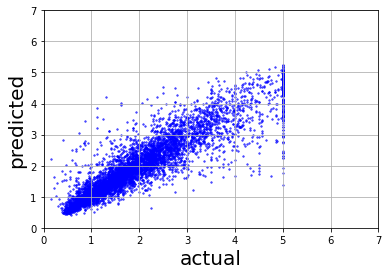

In [6]:
#  graph

plt.xlim(0, 7) 
plt.ylim(0, 7) 
plt.xlabel('actual', fontsize=20) 
plt.ylabel('predicted', fontsize=20)
plt.grid(True) 
plt.scatter(y_test, y_pred, s=2, c='b', marker='D', alpha=0.5) 
plt.show()

In [7]:
# モデル出力

filename = './models/price.sav'
pickle.dump(model, open(filename, 'wb'))